In [1]:
import pandas as pd
import numpy as np  # For numerical operation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations



📅 Daily Log and Progress Tracker
✅ Day 1 - 2025-03-31
Imported dataset athlete_events.csv
Displayed basic info using df.info(), df.describe()
Checked for missing values using df.isnull().sum()

In [3]:
#Loading the Dataset
df=pd.read_csv(r'C:\Users\asus\Downloads\dataset_olympic.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
#Summary statistics for numerical columns
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [6]:
# Count missing values in each column
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(383)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
print(df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


✅ Day 2 - 2025-04-1
Performed general analysis:
Counted unique athletes, sports, and events
Found most common sports and events using value_counts()

In [11]:
#Determine the total number of unique athletes, sports, and events
print("Total unique athletes:", df['Name'].nunique())


Total unique athletes: 35556


In [12]:
print("Total unique sports:", df['Sport'].nunique())


Total unique sports: 65


In [19]:
print("Total unique events:", df['Event'].nunique())

Total unique events: 744


In [21]:
print("Most common sports:\n",df['Sport'].value_counts().head(10)) 

Most common sports:
 Sport
Athletics               10629
Gymnastics               6248
Swimming                 5964
Fencing                  3096
Shooting                 3040
Cycling                  2788
Rowing                   2690
Alpine Skiing            2326
Cross Country Skiing     2153
Football                 1959
Name: count, dtype: int64


In [22]:
print("Most common events:\n",df['Event'].value_counts().head(10)) 

Most common events:
 Event
Football Men's Football                   1738
Hockey Men's Hockey                       1133
Ice Hockey Men's Ice Hockey               1009
Basketball Men's Basketball                921
Water Polo Men's Water Polo                911
Cycling Men's Road Race, Individual        737
Rowing Men's Coxed Eights                  648
Athletics Men's 4 x 100 metres Relay       591
Athletics Men's 100 metres                 585
Gymnastics Men's Individual All-Around     583
Name: count, dtype: int64


In [9]:
# Count of medals won by each country (NOC)
medal_counts = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
print(medal_counts)


NOC
USA    1561
FRA     660
ITA     604
GBR     604
URS     515
       ... 
WIF       0
YEM       0
YAR       0
YMD       0
ZAM       0
Name: Medal, Length: 226, dtype: int64


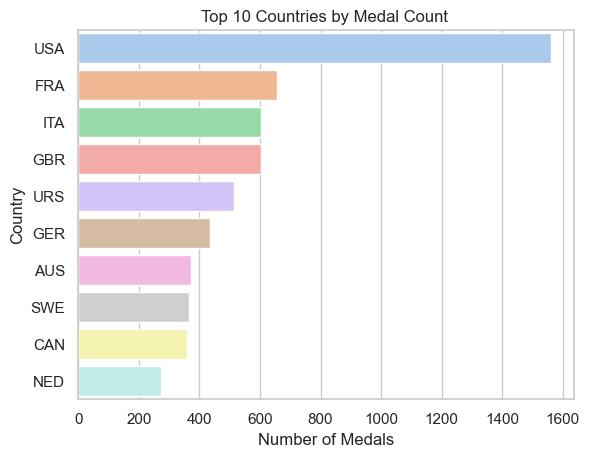

In [23]:
top_countries = medal_data['NOC'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Medals']

sns.barplot(
    data=top_countries,
    x='Medals',
    y='Country',
    hue='Country',
    dodge=False,
    palette='pastel',
    legend=False
)
plt.title("Top 10 Countries by Medal Count ")
plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.show()



In [10]:
# Number of athletes in Summer vs. Winter Olympics
season_comparison = df.groupby("Season")["ID"].nunique()
print(season_comparison)


Season
Summer    31209
Winter     4486
Name: ID, dtype: int64


In [16]:
 #calculating the average age of participants in each sport
age_analysis = df.groupby("Sport")["Age"].mean().sort_values()
print(age_analysis.head(10))


Sport
Rhythmic Gymnastics          18.557692
Swimming                     20.525409
Synchronized Swimming        22.121569
Racquets                     22.333333
Diving                       22.377778
Figure Skating               22.402397
Gymnastics                   22.574747
Boxing                       22.908216
Short Track Speed Skating    22.910112
Alpine Skiing                23.099740
Name: Age, dtype: float64


In [17]:
df.groupby('Sport')[['Age', 'Height', 'Weight']].mean().sort_values(by='Age', ascending=False)


,Age,Height,Weight
Sport,,,
Art Competitions,45.662162,180.733333,86.000000
Alpinism,40.666667,NaN,NaN
Roque,37.000000,NaN,NaN
Jeu De Paume,36.000000,NaN,NaN
Polo,35.388889,NaN,NaN
...,...,...,...
Diving,22.377778,166.197441,60.486590
Racquets,22.333333,NaN,NaN
Synchronized Swimming,22.121569,167.721311,55.799163


In [18]:
 #Find sports with youngest and oldest participants
df.groupby('Sport')['Age'].mean().sort_values(ascending=False)


Sport
Art Competitions         45.662162
Alpinism                 40.666667
Roque                    37.000000
Jeu De Paume             36.000000
Polo                     35.388889
                           ...    
Diving                   22.377778
Racquets                 22.333333
Synchronized Swimming    22.121569
Swimming                 20.525409
Rhythmic Gymnastics      18.557692
Name: Age, Length: 65, dtype: float64

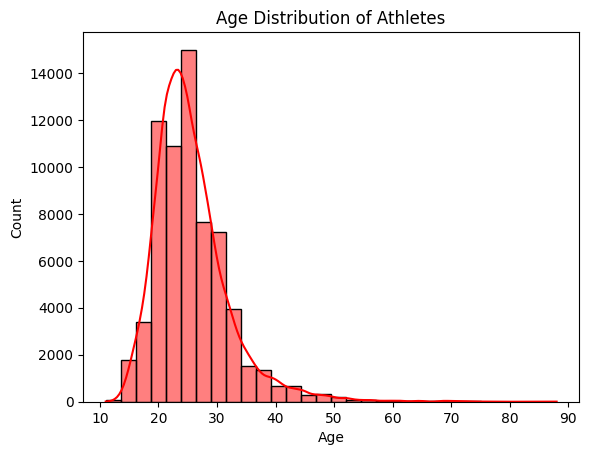

In [27]:
# Univariate Analysis (Individual Feature Analysis)
#Distribution of Numerical Features (Age, Height, Weight)
sns.histplot(df['Age'], bins=30, kde=True,color="red")
plt.title("Age Distribution of Athletes")
plt.show()